___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

In [1]:
import pandas as pd
df =pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [2]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [3]:
import seaborn as sns

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

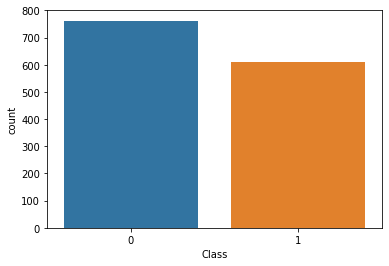

In [4]:
sns.countplot(x='Class',data=df)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

In [5]:
#sns.pairplot(data=df,hue='Class')

## Data Preparation 


### Standard Scaling



In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
df.columns[:-1]

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [8]:
scaler.fit(df[['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy']].values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
trans=scaler.transform(df[['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy']].values)


In [10]:

trans=pd.DataFrame(trans)
trans.columns=['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy']
trans

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


In [11]:
from sklearn.model_selection import train_test_split
X=trans[['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy']]
y=df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.6)

# Tensorflow

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10)

In [14]:
model=Sequential()
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(4,activation='sigmoid'))
# model.add(Dense(4,activation='sigmoid'))


model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,epochs=100,batch_size=32,callbacks=es)

Epoch 1/100
18/18 [==============================] - 1s 1ms/step - loss: 0.6884 - accuracy: 0.5619
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.5972
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5409
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5788
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5720
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5571
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5394
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5586
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5644
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6751 - accuracy: 0.5657
Epoch 11/

Epoch 83/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1260 - accuracy: 0.9814
Epoch 84/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9824
Epoch 85/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.9837
Epoch 86/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9853
Epoch 87/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9746
Epoch 88/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9817
Epoch 89/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1045 - accuracy: 0.9859
Epoch 90/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.9763
Epoch 91/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9710
Epoch 92/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9760


In [16]:
pred1=model.predict(X_test)
pred=pred1
pred1.shape
type(y_test)
true_values=pd.Series(y_test.values)
true_values

0      1
1      1
2      0
3      0
4      0
      ..
819    0
820    1
821    1
822    1
823    1
Length: 824, dtype: int64

In [17]:
pred1= pd.Series(pred1.reshape(824,))
#type(pred1)
pred_df = pd.DataFrame(true_values,columns=['Actual Y values'])

# type(pred_df)
pred_df=pd.concat([pred1,pred_df],axis=1)
pred_df.columns=['Predicted Y values','Actual Y values']
#pred_df
for i in pred_df['Predicted Y values']:
    if i<0.5:
        i=0
    else:
        i=1


In [33]:
a=[]
for i in pred_df['Predicted Y values'].values:
    if i<0.5:
        a.append(0)
    else:
        a.append(1)
a
finvalues=pd.Series(a)
final_df=pd.DataFrame(true_values, columns=['Actual Values'])
final_df=pd.concat([final_df,finvalues],axis=1)
final_df.columns=['Actual Class','Predicted Class']

In [35]:
# # #type(pred1)
# # #type(true_values)
from sklearn.metrics import confusion_matrix
# confusion_matrix(pred_df['Predicted Y values'],pred_df['Actual Y values'])
# # print("Accuracy")
# # from sklearn.metrics import accuracy_score
# # accuracy_score(pred_df['Predicted Y values'],pred_df['Actual Y values'
test_values=y_test.to_numpy().tolist()
predicted=finvalues.tolist()
confusion_matrix(test_values,predicted)

array([[441,  11],
       [  2, 370]])